### Objective
Plot the emittance evolution in both x and y planes for all the different ayy values, for all the different sets of noise kicks. For each set of noise kick the avergae over the usually three different runs is used. **The objective is to see the impact of the different noise kicks sequence depending on the tune spread value.**

The impact is expected to be large for small tune spreads and insignificant for large tune spread values.

Note: If the number of ayy is odd, then the last value is not plotted for the figure to be symmetric :P. 

In [3]:
import sys
import csv
import numpy as np
import pickle
import matplotlib.pyplot as plt

#### Plotting paramerters

In [28]:
params = {'legend.fontsize': 25,
          'figure.figsize': (20.5, 18.5),
          'axes.labelsize': 27,
          'axes.titlesize': 25,
          'xtick.labelsize': 27,
          'ytick.labelsize': 27,
          'image.cmap': 'jet',
          'lines.linewidth': 2,
          'lines.markersize': 5,
          'font.family': 'sans-serif'}

plt.rc('text', usetex=False)
plt.rc('font', family='serif')
plt.rcParams.update(params)

#### 1) Load the data
a) Give the paths to the data folder

b) Load the values of the transverse emittances in lists.

In [5]:
n_sets = 20
n_runs = 3 # number of runs that the simulation was repeated
n_turns = int(1e5)            # number of cycles to run the simulation for
decTurns = int(100)           # how often to record data
circumference  = 6911.5623 # [m]
f_rev  = 299792458/circumference  # [Hz] The revolution frequency of the machine 
separationTime = 1 / f_rev * decTurns #There are decTurns revolutions before each recording of data
tspan = (np.arange(n_turns / decTurns) + 1.0) * separationTime #total time spanned by the simulation

In [6]:
my_start = 400.0 #9.6e3 #400.0
my_stop =  1.6e4#1.6e4 #1.6e4
my_step = 800.0

my_variables = list(np.arange(my_start, my_stop, my_step))
my_variables.insert(0,0.0)
print(my_variables)
print(len(my_variables))

[0.0, 400.0, 1200.0, 2000.0, 2800.0, 3600.0, 4400.0, 5200.0, 6000.0, 6800.0, 7600.0, 8400.0, 9200.0, 10000.0, 10800.0, 11600.0, 12400.0, 13200.0, 14000.0, 14800.0, 15600.0]
21


In [43]:
path_to_data = '/afs/cern.ch/work/n/natriant/private/pyheadtail_example_crabcavity/'
study_name = 'sps_270GeV_CC_PN1e-8_1e5turns_5e5Nb_wakefieldsON_500slices_ayy'
noise_type = 'PN'

In [44]:
ex_mean_dict, ey_mean_dict = {}, {} # type: dictionary
ex_std_dict, ey_std_dict = {}, {} # type: dictionary


for var in my_variables:
    for my_set in range(n_sets):
        temp_name = f'{var}_set{my_set}'
        ex_mean, ey_mean = [], []
        for run in range(n_runs):
            try:
                meanX, meanY, meanXsq, meanYsq, emitX, emitY = np.loadtxt(path_to_data+f'{study_name}{var}_fixedKicksSet{my_set}_run{run}/file.txt', delimiter = ",", unpack = True)
                # B1. Create a different list for each run and save the emittance values
                ex_mean.append(emitX)
                ey_mean.append(emitY)
            except OSError as err:
                print("OS error: {0}".format(err))
                #ex_dict[temp_name] = np.zeros(len(tspan)) 
                #ey_dict[temp_name] = np.zeros(len(tspan))
        ex_mean_dict[temp_name] = np.mean(ex_mean, axis=0)
        ey_mean_dict[temp_name] = np.mean(ey_mean, axis=0)
        ex_std_dict[temp_name] = np.std(ex_mean, axis=0)
        ey_std_dict[temp_name] = np.std(ey_mean, axis=0)
        
        

OS error: /afs/cern.ch/work/n/natriant/private/pyheadtail_example_crabcavity/sps_270GeV_CC_PN1e-8_1e5turns_5e5Nb_wakefieldsON_500slices_ayy8400.0_fixedKicksSet7_run0/file.txt not found.


### Plot all Sets all runs, y-plane

The different colors correspond to the 20 different sets

In [45]:
savefig = False

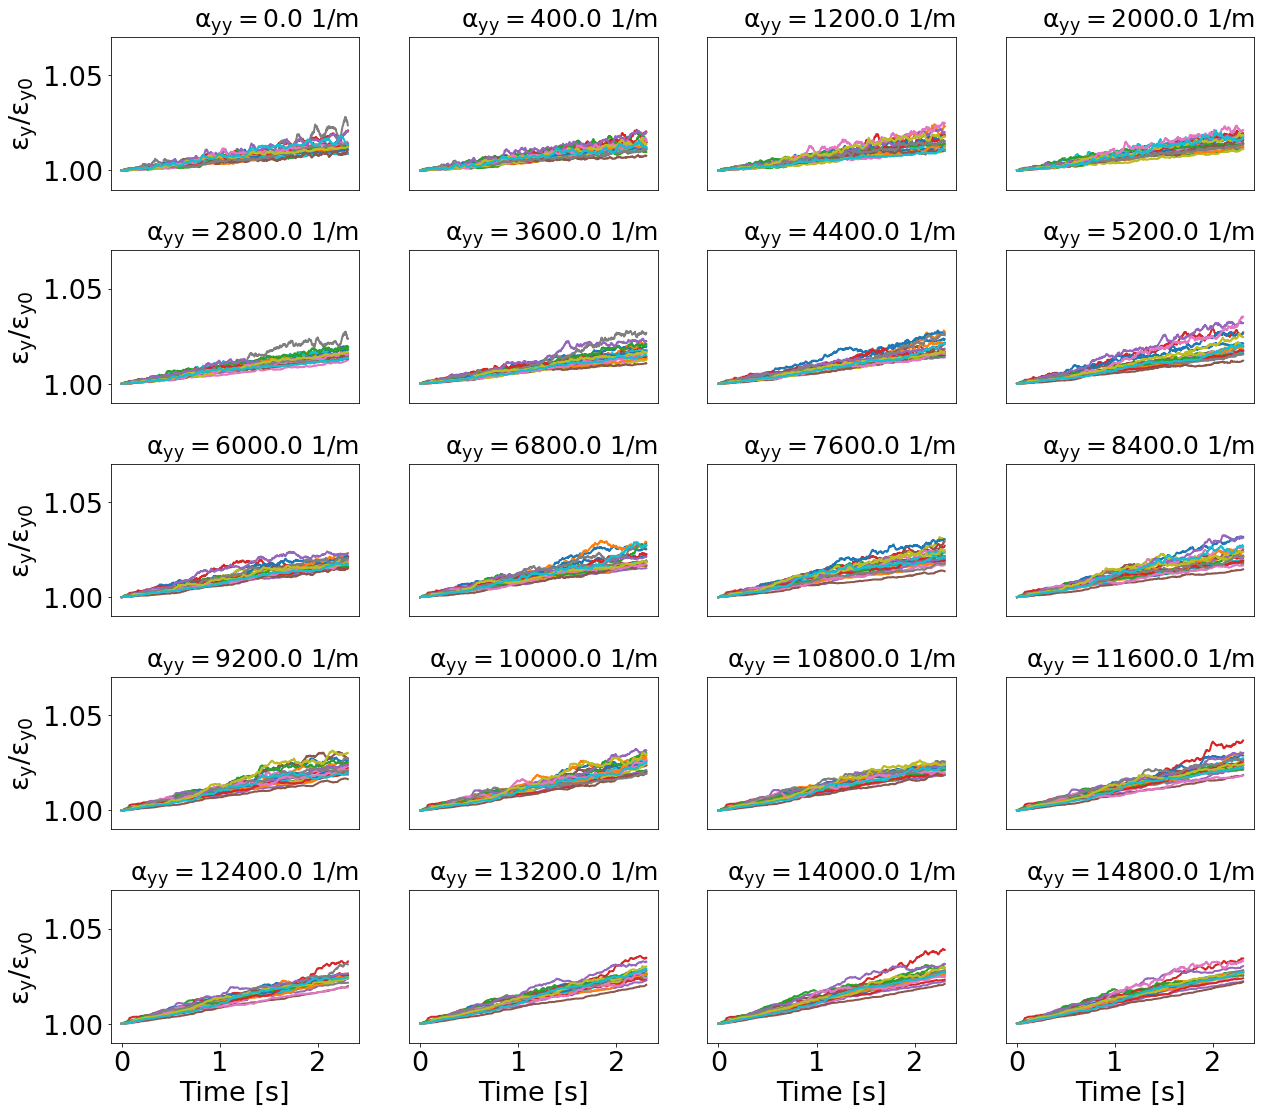

In [46]:
plt.figure(0)
plots = []
index = 0 
var = my_variables[index]


for i in range(5):  
    for j in range(4): 
        ax = plt.subplot2grid((5,4), (i,j)) # (5,4)
        for my_set in range(n_sets):
            #print(var)
            temp_name = f'{var}_set{my_set}'
            ax.plot(tspan, ey_mean_dict[temp_name]/ey_mean_dict[temp_name][0])
            ax.set_ylim(0.99, 1.07)
            ax.set_title(r'$\mathrm{\alpha_{yy}=}$'+f'{var} 1/m', loc='right')
            ax.set_xlabel('Time [s]')
            
        if index in [0, 4, 8, 12, 16]:
            ax.set_ylabel(r'$\mathrm{\epsilon_y / \epsilon_{y0}}$')
        else:
            ax.get_yaxis().set_visible(False)
            
           
        if index <= 15:
            ax.get_xaxis().set_visible(False)
        index = index+1
        
        var = my_variables[index]
        
        
           
        
plt.subplots_adjust(wspace=0.2, hspace=0.4)


if savefig:
    plt.savefig(f'./output/ey_{study_name}_Scanayy_allsets_meanRuns.png', bbox_inches='tight')
plt.show()
plt.close()

### Plot all Sets all runs, x-plane

In [47]:
savefig= False

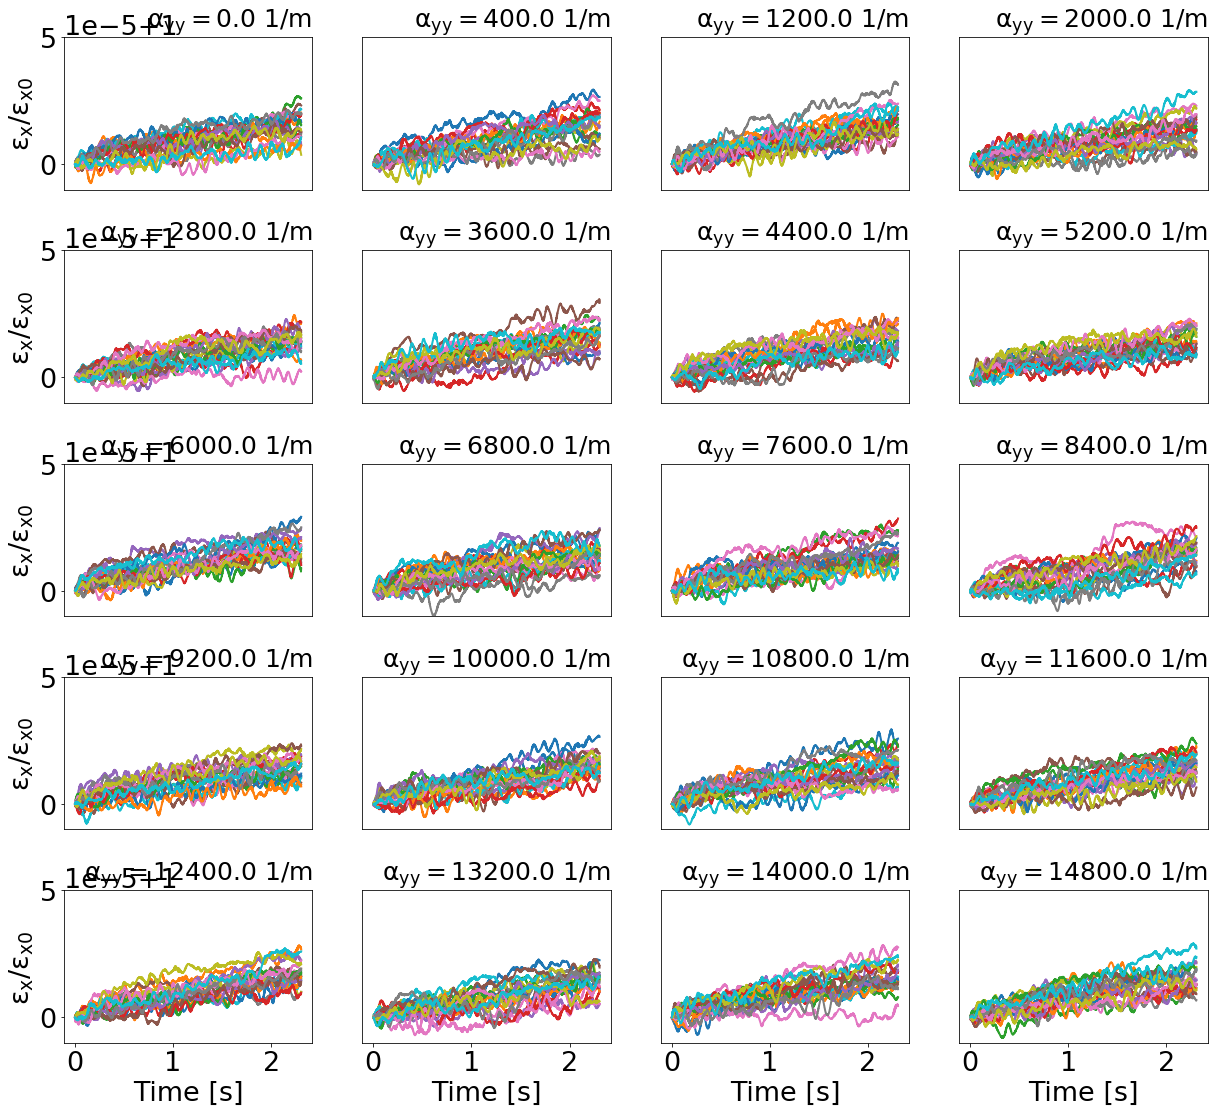

In [55]:
plt.figure(0)
plots = []
index = 0 
var = my_variables[index]


for i in range(5):  
    for j in range(4): 
        ax = plt.subplot2grid((5,4), (i,j)) # (5,4)
        for my_set in range(n_sets):
            #print(var)
            temp_name = f'{var}_set{my_set}'
            ax.plot(tspan, ex_mean_dict[temp_name]/ex_mean_dict[temp_name][0])
            #ax.set_ylim(1-1e-5, 1+1e-5)
            ax.set_ylim(1-1e-5, 1+5e-5)
            
            ax.set_title(r'$\mathrm{\alpha_{yy}=}$'+f'{var} 1/m', loc='right')
            ax.set_xlabel('Time [s]')
            ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
            
        if index in [0, 4, 8, 12, 16]:
            ax.set_ylabel(r'$\mathrm{\epsilon_x / \epsilon_{x0}}$')
        else:
            ax.get_yaxis().set_visible(False)
            
           
        if index <= 15:
            ax.get_xaxis().set_visible(False)
        index = index+1
        
        var = my_variables[index]
        
        
           
        
plt.subplots_adjust(wspace=0.2, hspace=0.4)


if savefig:
    plt.savefig(f'./output/ex_{study_name}_Scanayy_allsets_meanRuns.png', bbox_inches='tight')
plt.show()
plt.close()